<a href="https://colab.research.google.com/github/Anish32/recipe-analysis/blob/main/Recipe_Dataset_Analysis_and_Prediction_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('/content/recipe_data.csv')

In [3]:
df1=df.copy()

In [4]:
df.head()

,Recipe_ID,Recipe_Name,Cuisine_Type,Ingredients_List,Preparation_Steps,Cooking_Time_Minutes,Difficulty_Level,User_ID,User_Preferences,User_Rating,User_Feedback,Date_Prepared,Season,Occasion,Serving_Size,Calories_Per_Serving,Allergen_Information,Cost_Per_Serving,Popularity_Score,Seasonal_Availability
0,R001,Beef Tacos,Mexican,"Beef, Taco Shells, Lettuce, Cheese, Tomato",Cook beef; Prepare toppings; Assemble tacos.,55,Medium,U539,NaN,3,Feedback 1,2024-07-06,Spring,Party,4,509,NaN,14.12,402,No
1,R002,Spaghetti Bolognese,Italian,"Spaghetti, Ground Beef, Tomato Sauce, Onion, G...",Boil pasta; Cook beef; Add sauce; Combine.,39,Easy,U538,NaN,2,Feedback 2,2024-02-24,Winter,Casual,4,275,Gluten,16.07,183,No
2,R003,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,36,Medium,U324,Gluten-Free,4,Feedback 3,2024-02-14,Winter,Party,5,293,NaN,11.97,137,Yes
3,R004,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,45,Medium,U548,Gluten-Free,2,Feedback 4,2024-04-13,Spring,Casual,6,580,NaN,10.36,246,Yes
4,R005,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,85,Easy,U990,Vegan,5,Feedback 5,2024-08-03,Fall,Dinner,4,641,Soy,12.68,386,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recipe_ID              5000 non-null   object 
 1   Recipe_Name            5000 non-null   object 
 2   Cuisine_Type           5000 non-null   object 
 3   Ingredients_List       5000 non-null   object 
 4   Preparation_Steps      5000 non-null   object 
 5   Cooking_Time_Minutes   5000 non-null   int64  
 6   Difficulty_Level       5000 non-null   object 
 7   User_ID                5000 non-null   object 
 8   User_Preferences       2997 non-null   object 
 9   User_Rating            5000 non-null   int64  
 10  User_Feedback          5000 non-null   object 
 11  Date_Prepared          5000 non-null   object 
 12  Season                 5000 non-null   object 
 13  Occasion               5000 non-null   object 
 14  Serving_Size           5000 non-null   int64  
 15  Calo

In [6]:
df.describe()

,Cooking_Time_Minutes,User_Rating,Serving_Size,Calories_Per_Serving,Cost_Per_Serving,Popularity_Score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.991400,3.021200,3.527400,497.754600,12.594950,276.081000
std,21.944586,1.413772,1.697948,173.446297,4.325058,129.743251
min,15.000000,1.000000,1.000000,200.000000,5.000000,50.000000
25%,33.000000,2.000000,2.000000,348.000000,8.857500,166.000000
50%,52.000000,3.000000,4.000000,493.000000,12.625000,274.000000
75%,71.000000,4.000000,5.000000,649.250000,16.370000,388.000000
max,90.000000,5.000000,6.000000,800.000000,20.000000,500.000000


In [7]:
df.shape

(5000, 20)

In [8]:
df.isnull().sum()

,0
Recipe_ID,0
Recipe_Name,0
Cuisine_Type,0
Ingredients_List,0
Preparation_Steps,0
Cooking_Time_Minutes,0
Difficulty_Level,0
User_ID,0
User_Preferences,2003
User_Rating,0


In [9]:
df['Date_Prepared'] = pd.to_datetime(df['Date_Prepared'], errors='coerce')

# Check data types
df.dtypes

,0
Recipe_ID,object
Recipe_Name,object
Cuisine_Type,object
Ingredients_List,object
Preparation_Steps,object
Cooking_Time_Minutes,int64
Difficulty_Level,object
User_ID,object
User_Preferences,object
User_Rating,int64


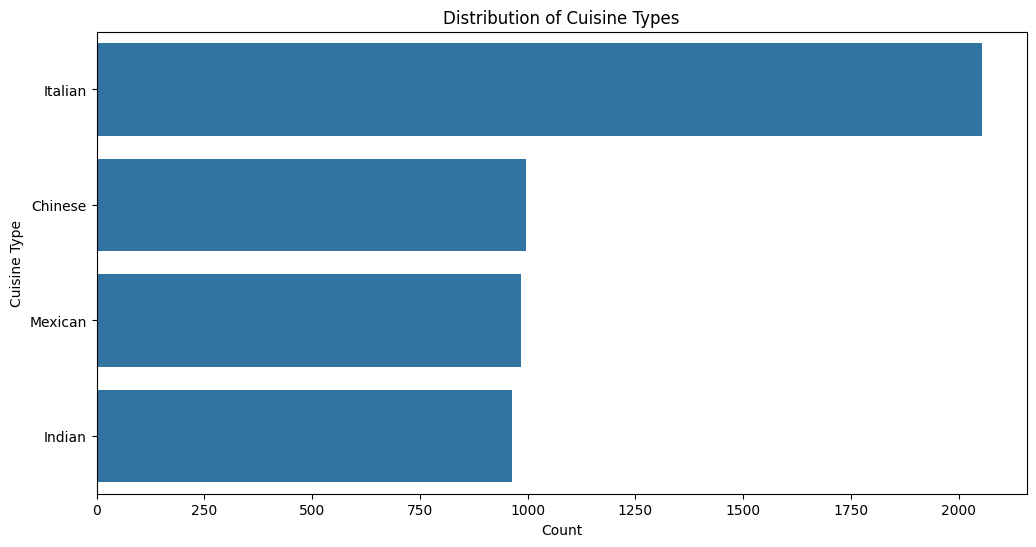

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Cuisine_Type', data=df, order=df['Cuisine_Type'].value_counts().index)
plt.title('Distribution of Cuisine Types')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()

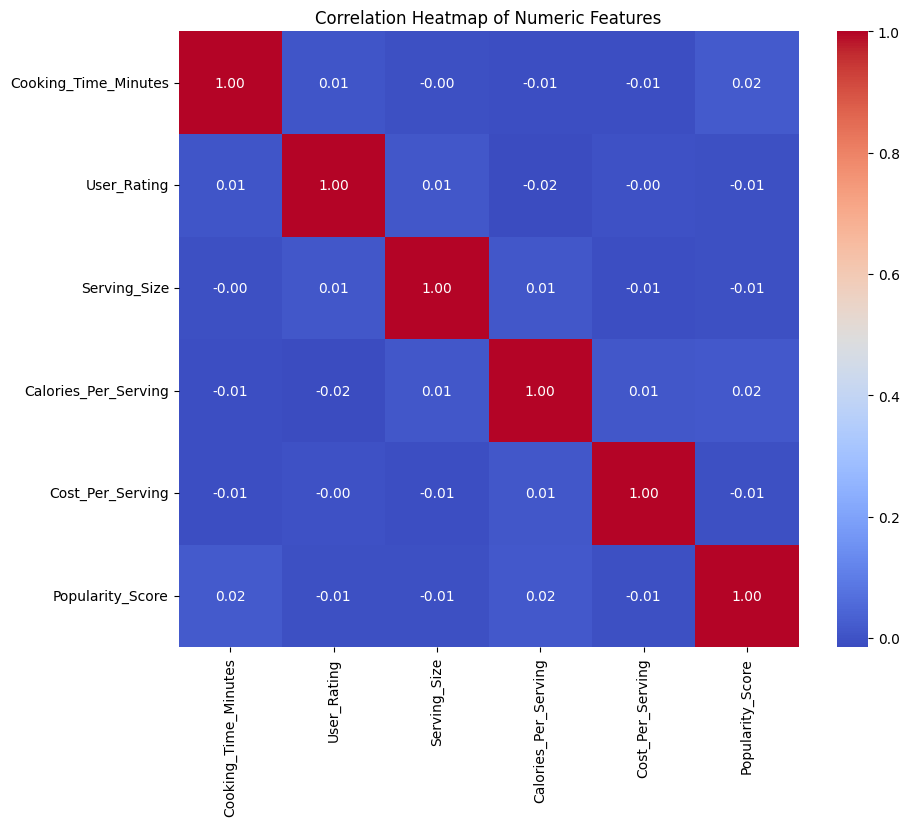

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [12]:
df['Num_Ingredients'] = df['Ingredients_List'].apply(lambda x: len(x.split(',')))

# Check the new feature
df[['Ingredients_List', 'Num_Ingredients']].head()

,Ingredients_List,Num_Ingredients
0,"Beef, Taco Shells, Lettuce, Cheese, Tomato",5
1,"Spaghetti, Ground Beef, Tomato Sauce, Onion, G...",5
2,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",5
3,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",5
4,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",5


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
features = ['Cooking_Time_Minutes', 'Serving_Size', 'Calories_Per_Serving', 'Cost_Per_Serving', 'Num_Ingredients']
target = 'Popularity_Score'

# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse


133.4664782981105

In [14]:
Cooking_Time_Minutes = float(input("Enter Cooking Time in Minutes: "))
Serving_Size = float(input("Enter Serving Size: "))
Calories_Per_Serving = float(input("Enter Calories Per Serving: "))
Cost_Per_Serving = float(input("Enter Cost Per Serving: "))
Num_Ingredients = float(input("Enter Number of Ingredients: "))

# Create a DataFrame with the user input
user_input = pd.DataFrame({'Cooking_Time_Minutes': [Cooking_Time_Minutes], 'Serving_Size': [Serving_Size] , 'Calories_Per_Serving':[Calories_Per_Serving], 'Cost_Per_Serving':[Cost_Per_Serving], 'Num_Ingredients':[Num_Ingredients]})
prediction = model.predict(user_input)
print(prediction)

Enter Cooking Time in Minutes: 10
Enter Serving Size: 30
Enter Calories Per Serving: 2
Enter Cost Per Serving: 2
Enter Number of Ingredients: 6
[245.04]


In [15]:
import pickle
pickle.dump(model,open('Rndm_rgsr_mdl.pkl','wb'))

In [16]:
import pickle
import pandas as pd

# Load the model
with open('Rndm_rgsr_mdl.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Get user input for prediction
Cooking_Time_Minutes = float(input("Enter Cooking Time in Minutes: "))
Serving_Size = float(input("Enter Serving Size: "))
Calories_Per_Serving = float(input("Enter Calories Per Serving: "))
Cost_Per_Serving = float(input("Enter Cost Per Serving: "))
Num_Ingredients = float(input("Enter Number of Ingredients: "))

# Create a DataFrame with the user input
user_input = pd.DataFrame({
    'Cooking_Time_Minutes': [Cooking_Time_Minutes],
    'Serving_Size': [Serving_Size],
    'Calories_Per_Serving': [Calories_Per_Serving],
    'Cost_Per_Serving': [Cost_Per_Serving],
    'Num_Ingredients': [Num_Ingredients]
})

# Make prediction using the loaded model
prediction = loaded_model.predict(user_input)

# Print the prediction
print("Predicted Popularity Score:", prediction[0])

# Now you can use loaded_model for prediction

Enter Cooking Time in Minutes: 20
Enter Serving Size: 5
Enter Calories Per Serving: 2
Enter Cost Per Serving: 3000
Enter Number of Ingredients: 10
Predicted Popularity Score: 254.24


In [17]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [18]:
%%writefile G_Run_run.py
import streamlit as st
import pandas as pd
import pickle

# Load the saved model
model = pickle.load(open('/content/Rndm_rgsr_mdl.pkl', 'rb'))

# Streamlit app
st.title("Recipe Popularity Prediction")

Cooking_Time_Minutes = st.number_input("Enter Cooking Time in Minutes:", min_value=0.0)
Serving_Size = st.number_input("Enter Serving Size:", min_value=0.0)
Calories_Per_Serving = st.number_input("Enter Calories Per Serving:", min_value=0.0)
Cost_Per_Serving = st.number_input("Enter Cost Per Serving:", min_value=0.0)
Num_Ingredients = st.number_input("Enter Number of Ingredients:", min_value=0.0)

if st.button("Predict"):
    user_input = pd.DataFrame({
        'Cooking_Time_Minutes': [Cooking_Time_Minutes],
        'Serving_Size': [Serving_Size],
        'Calories_Per_Serving': [Calories_Per_Serving],
        'Cost_Per_Serving': [Cost_Per_Serving],
        'Num_Ingredients': [Num_Ingredients]
    })
    prediction = model.predict(user_input)
    st.success(f"The predicted popularity score is: {prediction[0]:.2f}")

Writing G_Run_run.py


In [19]:
!wget -q -O - ipv4.icanhazip.com

34.125.91.200


In [ ]:
!streamlit run /content/G_Run_run.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.91.200:8501

Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://slick-foxes-serve.loca.lt
